## Лабораторная работа №8

In [50]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

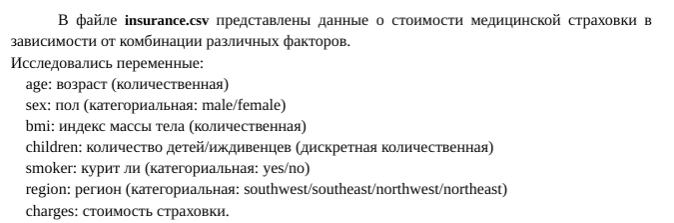

In [51]:
df = pd.read_csv("../data/lab8/insurance.csv", sep=",")
display(df)
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


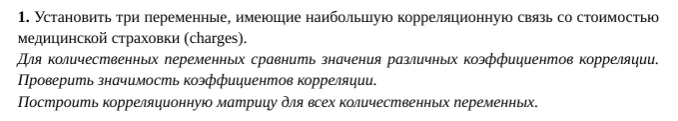

In [52]:
def region_metric(x):
    if x == 'southwest':
        return 0
    elif x == 'southeast':
        return 1
    elif x == 'northwest':
        return 2
    elif x == 'northeast':
        return 3
    return None

df['sex_metric'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker_metric'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df['region_metric'] = df['region'].apply(region_metric)

columns = ['age', 'bmi', 'children', 'charges', 'sex_metric', 'smoker_metric', 'region_metric']

numeric = ['age', 'bmi', 'children', 'charges']
df_norm_test = df[numeric].apply(lambda x: stats.kstest(x, 'norm', args=(x.mean(), x.std())))
print(round(df_norm_test, 3))

corr_matrix = df[columns].corr()
corr_matrix = corr_matrix['charges'].drop('charges').sort_values(ascending=False)

print("Корреляция переменных с charges")
print(corr_matrix.round(3))

print("\nТри переменные с наибольшей корреляцией с charges:")
print(corr_matrix.round(3)[:3])

def corr_coefficients(df, x, y):
    results = []

    for col in x:
        pearson_corr, p_pearson = stats.pearsonr(df[col], df[y])
        spearman_corr, p_spearman = stats.spearmanr(df[col], df[y])
        kendall_corr, p_kendall = stats.kendalltau(df[col], df[y])

        results.append({
            'column': col,
            'pearson': pearson_corr,
            'p_pearson': p_pearson,
            'spearman': spearman_corr,
            'p_spearman': p_spearman,
            'kendall': kendall_corr,
            'p_kendall': p_kendall
        })

    return pd.DataFrame(results)

print("\nКоэффициенты корреляции для количественных переменных:")
correlations = corr_coefficients(df, ['age', 'bmi', 'children'], 'charges')
print(correlations.round(3))

numeric_corr_matrix = df[numeric].corr()
print("\nКорреляционная матрица количественных переменных:")
print(numeric_corr_matrix.round(3))


     age    bmi  children  charges
0  0.079  0.026     0.247    0.188
1  0.000  0.316     0.000    0.000
Корреляция переменных с charges
smoker_metric    0.787
age              0.299
bmi              0.198
children         0.068
sex_metric       0.057
region_metric    0.006
Name: charges, dtype: float64

Три переменные с наибольшей корреляцией с charges:
smoker_metric    0.787
age              0.299
bmi              0.198
Name: charges, dtype: float64

Коэффициенты корреляции для количественных переменных:
     column  pearson  p_pearson  spearman  p_spearman  kendall  p_kendall
0       age    0.299      0.000     0.534         0.0    0.475        0.0
1       bmi    0.198      0.000     0.119         0.0    0.083        0.0
2  children    0.068      0.013     0.133         0.0    0.103        0.0

Корреляционная матрица количественных переменных:
            age    bmi  children  charges
age       1.000  0.109     0.042    0.299
bmi       0.109  1.000     0.013    0.198
children  0.042

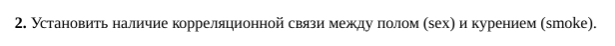

In [53]:
contingency_table = pd.crosstab(df['sex'], df['smoker'])
print("Таблица сопряжённости. Наблюдаемые частоты")
display(contingency_table)

chi2, p_value, _, expected = stats.chi2_contingency(contingency_table)
print(f"Статистика Фишера-Пирсона хи-квадрат: {chi2}")
print(f"p_value: {p_value}")

expected_df = pd.DataFrame(
    expected,
    index=contingency_table.index,
    columns=contingency_table.columns
)

print("Ожидаемые частоты")
display(expected_df.round(2))

Таблица сопряжённости. Наблюдаемые частоты


smoker,no,yes
sex,,
female,547,115
male,517,159


Статистика Фишера-Пирсона хи-квадрат: 7.39291081459996
p_value: 0.006548143503580697
Ожидаемые частоты


smoker,no,yes
sex,,
female,526.43,135.57
male,537.57,138.43


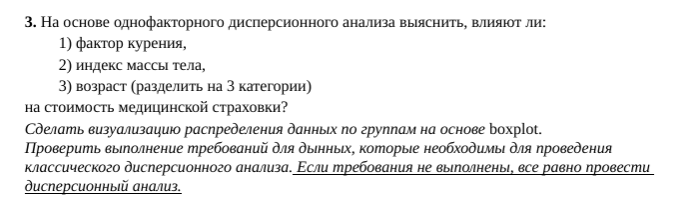

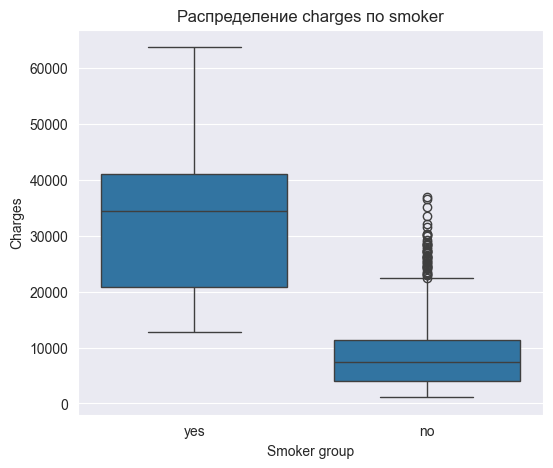

Критерий Колмогорова
smoker
no     (0.11123305162290997, 6.379515833221225e-12)
yes    (0.12135574013148243, 0.0005650280349912758)
Name: charges, dtype: object

Тест Левена
Статистика = 332.6135162726081, p_value = 1.5593284881803726e-66

Дисперсионный анализ
               df        sum_sq       mean_sq            F         PR(>F)
C(smoker)     1.0  1.215199e+11  1.215199e+11  2177.614868  8.271436e-283
Residual   1336.0  7.455432e+10  5.580413e+07          NaN            NaN


In [54]:
plt.figure(figsize=(6,5))
sb.boxplot(x='smoker', y='charges', data=df)
plt.title('Распределение charges по smoker')
plt.xlabel('Smoker group')
plt.ylabel('Charges')
plt.show()

smoker_norm_test = df.groupby('smoker')['charges'].apply(lambda x: stats.kstest(x, 'norm', args=(x.mean(), x.std())))

print(f"Критерий Колмогорова\n{smoker_norm_test}\n")

smoker_yes = df.loc[df['smoker'] == 'yes', 'charges']
smoker_no = df.loc[df['smoker'] == 'no', 'charges']

levene_stat, levene_p = stats.levene(smoker_yes, smoker_no)
print(f"Тест Левена\nСтатистика = {levene_stat}, p_value = {levene_p}\n")

model = smf.ols('charges ~ C(smoker)', data=df).fit()

anova_table = anova_lm(model)
print("Дисперсионный анализ")
print(anova_table)

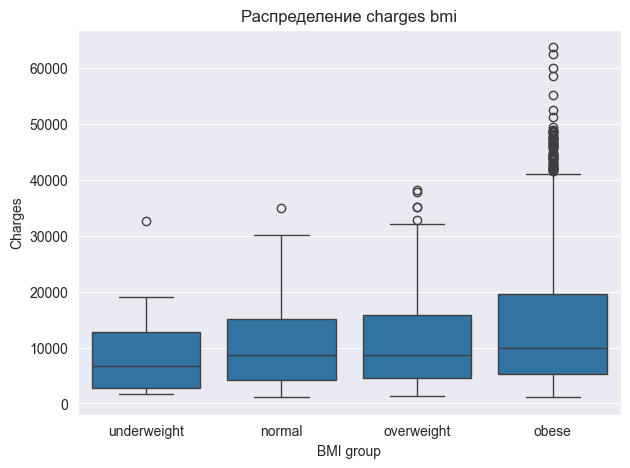

Критерий Колмогорова
bmi_group
underweight      (0.17700612932705684, 0.47291871328026713)
normal          (0.10995891249434608, 0.007790227412433513)
overweight      (0.12305219949869284, 1.49376417314984e-05)
obese          (0.24190800067743257, 8.423906375074933e-37)
Name: charges, dtype: object

Тест Левена
Статистика = 22.18739309900195, p_value = 5.0680413606370455e-14

Дисперсионный анализ
                  df        sum_sq       mean_sq          F        PR(>F)
C(bmi_group)     3.0  7.955555e+09  2.651852e+09  18.804992  5.997613e-12
Residual      1334.0  1.881187e+11  1.410185e+08        NaN           NaN


C:\Users\mazur\AppData\Local\Temp\ipykernel_15412\3336695442.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_norm_test = df.groupby('bmi_group')['charges'].apply(lambda x: stats.kstest(x, 'norm', args=(x.mean(), x.std())))


In [55]:
bins = [0, 18.5, 25, 30, np.inf]
labels = ['underweight', 'normal', 'overweight', 'obese']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels)

plt.figure(figsize=(7,5))
sb.boxplot(x='bmi_group', y='charges', data=df, order=labels)
plt.title('Распределение charges bmi')
plt.xlabel('BMI group')
plt.ylabel('Charges')
plt.show()

bmi_norm_test = df.groupby('bmi_group')['charges'].apply(lambda x: stats.kstest(x, 'norm', args=(x.mean(), x.std())))

print(f"Критерий Колмогорова\n{bmi_norm_test}\n")

underweight_group = df.loc[df['bmi_group'] == 'underweight', 'charges']
normal_group = df.loc[df['bmi_group'] == 'normal', 'charges']
overweight_group = df.loc[df['bmi_group'] == 'overweight', 'charges']
obese_group = df.loc[df['bmi_group'] == 'obese', 'charges']

levene_stat, levene_p = stats.levene(underweight_group, normal_group, overweight_group, obese_group)
print(f"Тест Левена\nСтатистика = {levene_stat}, p_value = {levene_p}\n")

model = smf.ols('charges ~ C(bmi_group)', data=df).fit()

anova_table = anova_lm(model)
print("Дисперсионный анализ")
print(anova_table)

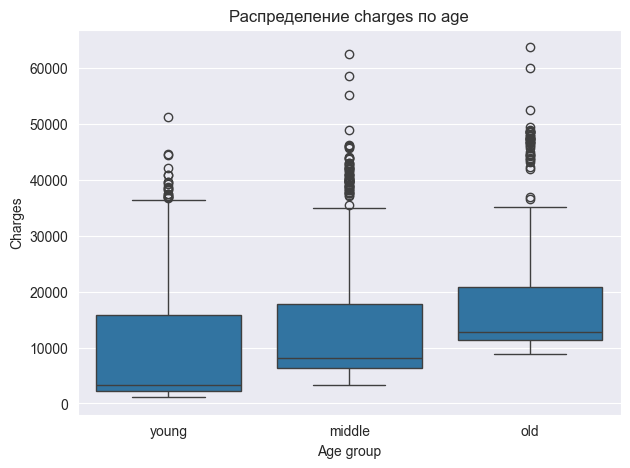

Критерий Колмогорова
age_group
young      (0.3332334371310277, 1.8822582645283856e-44)
middle    (0.30324546189150337, 2.1541845454636883e-44)
old        (0.3236050700853559, 1.1102510710372753e-33)
Name: charges, dtype: object

Тест Левена
Статистика = 0.06474543936606586, p_value = 0.9373089772347398

Дисперсионный анализ
                  df        sum_sq       mean_sq          F        PR(>F)
C(age_group)     2.0  1.491176e+10  7.455881e+09  54.942954  1.174483e-23
Residual      1335.0  1.811625e+11  1.357022e+08        NaN           NaN


In [56]:
bins = [17, 30, 50, np.inf]
labels = ["young", "middle", "old"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

plt.figure(figsize=(7,5))
sb.boxplot(x='age_group', y='charges', data=df, order=labels)
plt.title('Распределение charges по age')
plt.xlabel('Age group')
plt.ylabel('Charges')
plt.show()

age_norm_test = df.groupby('age_group', observed=True)['charges'].apply(lambda x: stats.kstest(x, 'norm', args=(x.mean(), x.std())))

print(f"Критерий Колмогорова\n{age_norm_test}\n")

young_group = df.loc[df['age_group'] == 'young', 'charges']
middle_group = df.loc[df['age_group'] == 'middle', 'charges']
senior_group = df.loc[df['age_group'] == 'old', 'charges']

levene_stat, levene_p = stats.levene(young_group, middle_group, senior_group)
print(f"Тест Левена\nСтатистика = {levene_stat}, p_value = {levene_p}\n")

model = smf.ols('charges ~ C(age_group)', data=df).fit()

anova_table = anova_lm(model)
print("Дисперсионный анализ")
print(anova_table)


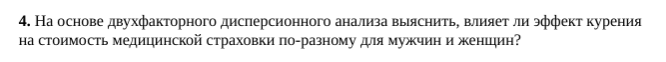

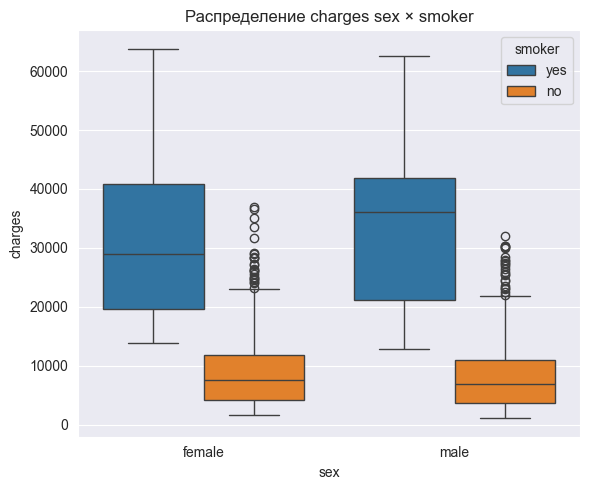


Критерий Колмогорова–Смирнова для каждой группы sex × smoker:
male_yes: D = 0.12311848824488131, p = 0.014711364713105609
male_no: D = 0.11921019774973929, p = 7.365368366448276e-07
female_yes: D = 0.13924234096418808, p = 0.02085425351335235
female_no: D = 0.11889935528639772, p = 3.397618885485272e-07

Тест Левена (однородность дисперсий):
Статистика = 99.63567744162368, p_value = 3.397330926257072e-58

Таблица двухфакторного дисперсионного анализа:
                        sum_sq      df            F         PR(>F)
C(sex)            1.421312e+06     1.0     0.025601   8.729026e-01
C(smoker)         1.208777e+11     1.0  2177.284440  1.247285e-282
C(sex):C(smoker)  4.923397e+08     1.0     8.868165   2.954255e-03
Residual          7.406056e+10  1334.0          NaN            NaN


In [57]:
plt.figure(figsize=(6, 5))
sb.boxplot(data=df, x="sex", y="charges", hue="smoker")
plt.title("Распределение charges sex × smoker")
plt.tight_layout()
plt.show()

male_yes = df.loc[(df['sex'] == 'male') & (df['smoker'] == 'yes'), 'charges']
male_no = df.loc[(df['sex'] == 'male') & (df['smoker'] == 'no'), 'charges']
female_yes = df.loc[(df['sex'] == 'female') & (df['smoker'] == 'yes'), 'charges']
female_no = df.loc[(df['sex'] == 'female') & (df['smoker'] == 'no'), 'charges']

D_male_yes, p_male_yes = stats.kstest(male_yes, 'norm', args=(male_yes.mean(), male_yes.std()))
D_male_no, p_male_no = stats.kstest(male_no, 'norm', args=(male_no.mean(), male_no.std()))
D_female_yes, p_female_yes = stats.kstest(female_yes, 'norm', args=(female_yes.mean(), female_yes.std()))
D_female_no, p_female_no = stats.kstest(female_no, 'norm', args=(female_no.mean(), female_no.std()))

print("\nКритерий Колмогорова–Смирнова для каждой группы sex × smoker:")
print(f"male_yes: D = {D_male_yes}, p = {p_male_yes}")
print(f"male_no: D = {D_male_no}, p = {p_male_no}")
print(f"female_yes: D = {D_female_yes}, p = {p_female_yes}")
print(f"female_no: D = {D_female_no}, p = {p_female_no}")

levene_stat, levene_p = stats.levene(male_yes, male_no, female_yes, female_no)
print(f"\nТест Левена (однородность дисперсий):\nСтатистика = {levene_stat}, p_value = {levene_p}")

formula = "charges ~ C(sex) + C(smoker) + C(sex):C(smoker)"
model = smf.ols(formula=formula, data=df).fit()
anova_res = anova_lm(model, typ=2)

print("\nТаблица двухфакторного дисперсионного анализа:")
print(anova_res)